### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `Amphet` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `Amphet` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [3]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['Amphet','Unnamed: 0'],axis=1)
y = df['Amphet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.8913509649749821
Test score: 0.8693790149892934


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



- **High Accuracy:** 
Both the training and testing scores are nearly identical and very high, indicating that the model is        performing well and is likely well-generalized to new, unseen data.
- **Low Overfitting Risk:**
 The close match between the train and test scores suggests that the model is not overfitting to the training   data.
- **Reliability:**
  Given the high accuracy, the model can be considered reliable for making predictions on new data within the   context of the data it was trained on.

### Coefficient analysis <a id='Coef'></a>

In [5]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.87531827]
Coefficients: [0.99483684 1.01042429 0.96658223 0.98640255 0.96944561 1.45183257
 1.40074259 0.66442464 1.55360525 4.02952364 1.50980111 1.39203148
 0.959319   2.2320559  1.05499079 1.73997662 1.01592036 2.77036747
 3.19427872 0.77003511 1.0163061  1.09977247 1.21135716 1.11657948
 0.89481218 0.85484696 1.03293421 1.218634   1.04083971 1.14723195
 0.82451471 0.70623235 0.82442408 1.16273915 0.92349714 1.17716711
 1.1751645  0.96120969 0.85798584 1.69391445 0.6114055  0.87971764
 2.94347622 1.49056146 0.87163892 0.43593337 0.89789674 0.319954
 1.84365624]


<Figure size 640x480 with 0 Axes>

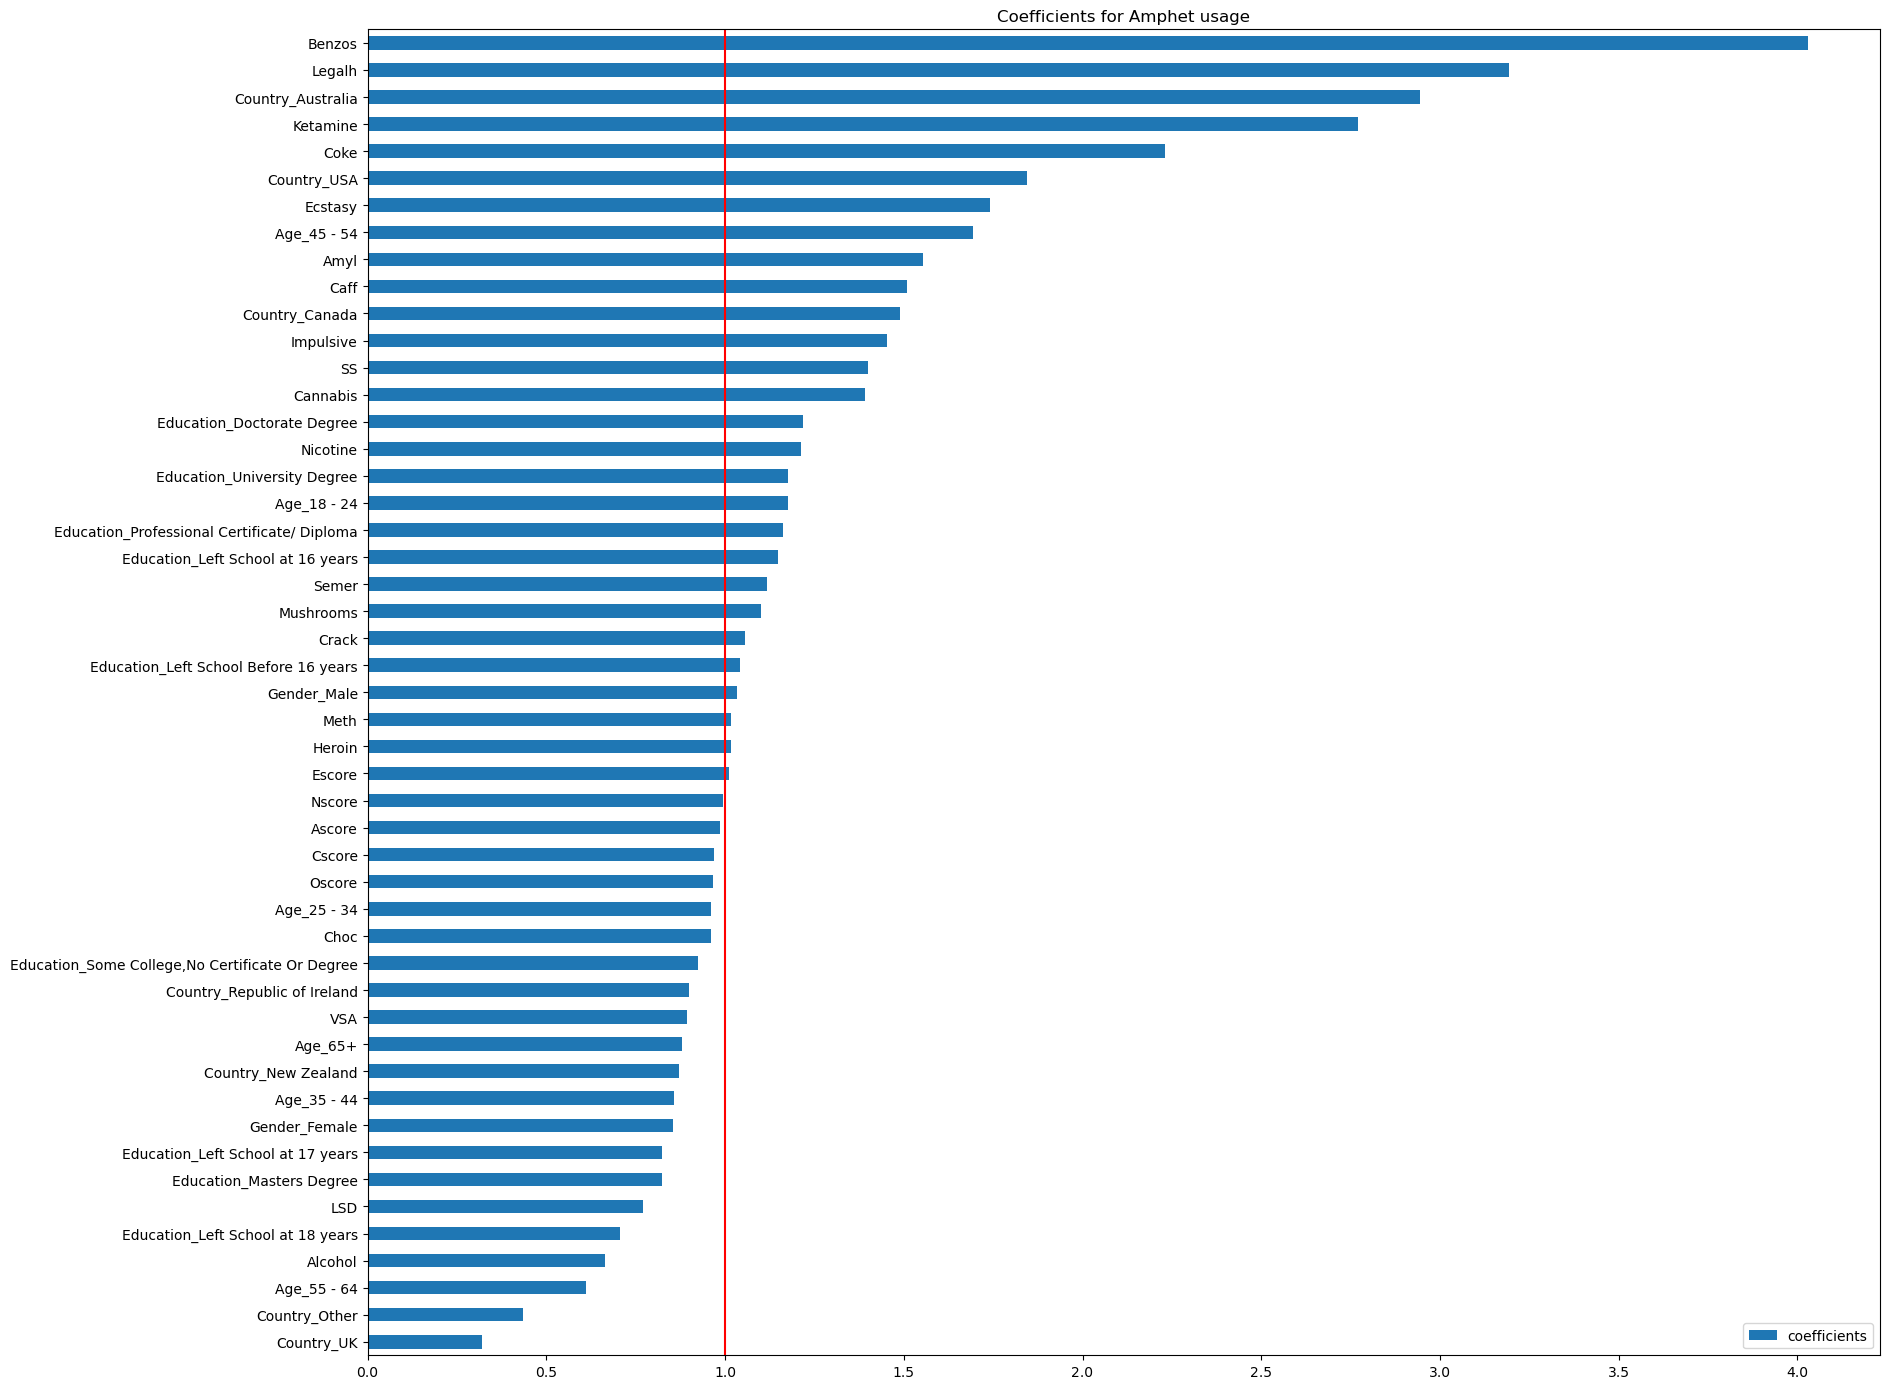

In [8]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for Amphet usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



The coefficients indicate varying degrees of influence on the predicted outcome. Factors like Education level (especially higher degrees), Age groups (older demographics), and specific countries (Australia, USA) show strong positive associations. Substance use predictors (Benzos, Ketamine) also exhibit significant impacts, suggesting their importance in modeling outcomes. Gender and certain psychometric scores (Oscore, Cscore) also play notable roles. Overall, these coefficients highlight the complex interplay of demographic, behavioral, and psychometric factors in predicting outcomes related to substance use and education.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[384,  24],
       [ 37,  22]])

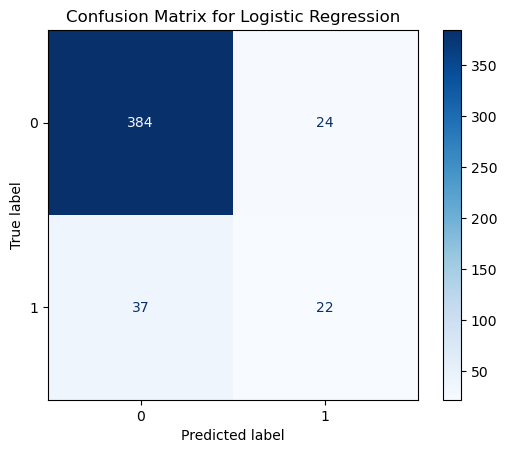

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       408
           1       0.48      0.37      0.42        59

    accuracy                           0.87       467
   macro avg       0.70      0.66      0.67       467
weighted avg       0.86      0.87      0.86       467



In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary

The logistic regression model achieved good overall performance, with a training score of 89.1% and a test score of 86.9%. It demonstrated strong precision (91%) and recall (94%) for the majority class (non-users), indicating robust identification of non-users. However, performance on the minority class (users) was less favorable, with precision at 48% and recall at 37%, resulting in a lower F1-score of 42%. The model's weighted average metrics suggest it effectively predicts non-users but struggles with accurate identification of users, highlighting potential challenges in addressing data imbalance for substance use prediction

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 100}
Best cross-validation score for Logistic Regression: 0.80
Test set score for Logistic Regression: 0.79

Confusion Matrix:
 [[331  77]
 [ 21  38]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       408
           1       0.33      0.64      0.44        59

    accuracy                           0.79       467
   macro avg       0.64      0.73      0.65       467
weighted avg       0.86      0.79      0.82       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.87
Test set score for Logistic Regression: 0.84

Confusion Matrix:
 [[369  39]
 [ 35  24]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       408
           1       0.38      0.41      0.39        59

    

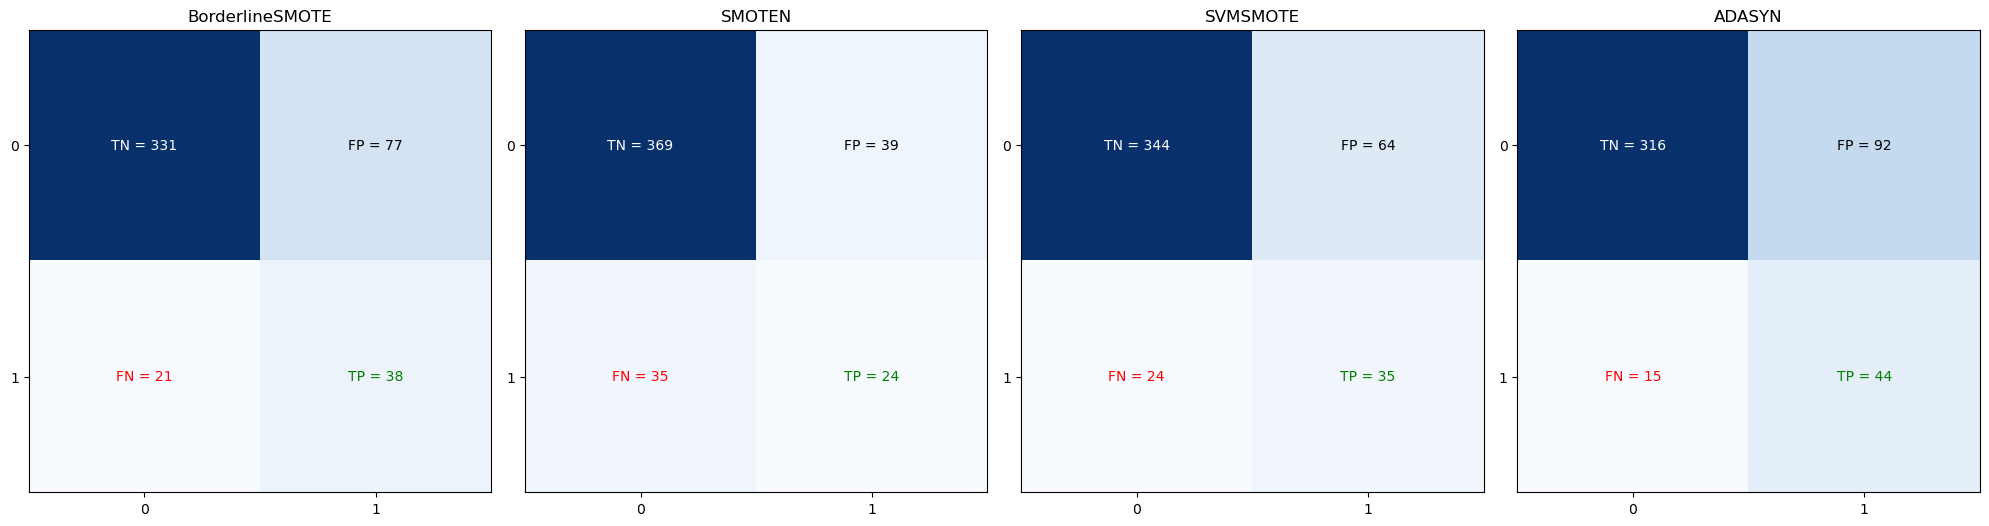

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()





### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary

Based on the results from various SMOTE techniques applied to logistic regression:

`BorderlineSMOTE:` Achieved a test score of 0.79 with a precision of 0.33 and recall of 0.64 for identifying users, showing moderate performance in handling the minority class.

`SMOTEN:` Achieved a test score of 0.84 with a precision of 0.38 and recall of 0.41 for users, indicating improved recall but lower precision compared to BorderlineSMOTE.

`SVMSMOTE:` Achieved a test score of 0.81 with a precision of 0.35 and recall of 0.59 for users, offering balanced performance metrics across precision and recall.

`ADASYN:` Achieved a test score of 0.77 with a precision of 0.32 and recall of 0.75 for users, indicating the highest recall but lowest precision among all techniques.

#### Conclusion:
While SVMSMOTE shows balanced performance metrics and ADASYN achieves the highest recall, the choice of technique depends on whether prioritizing recall (ADASYN) or a balanced approach (SVMSMOTE) is more critical given the data imbalance in identifying substance users.

### Logistic Regression with ADASYN <a id='logreg_ADA'></a>

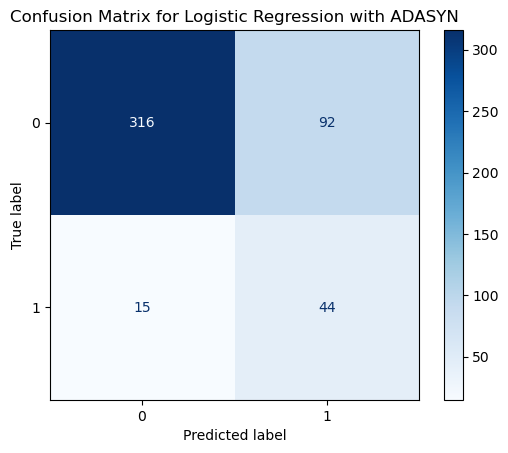

Best parameters for Logistic Regression:  {'C': 1, 'max_iter': 100}
Best cross-validation score for Logistic Regression: 0.81


In [11]:
## Model with BorderlineSMOTE method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply BorderlineSMOTE to handle imbalanced data
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with ADASYN")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [12]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

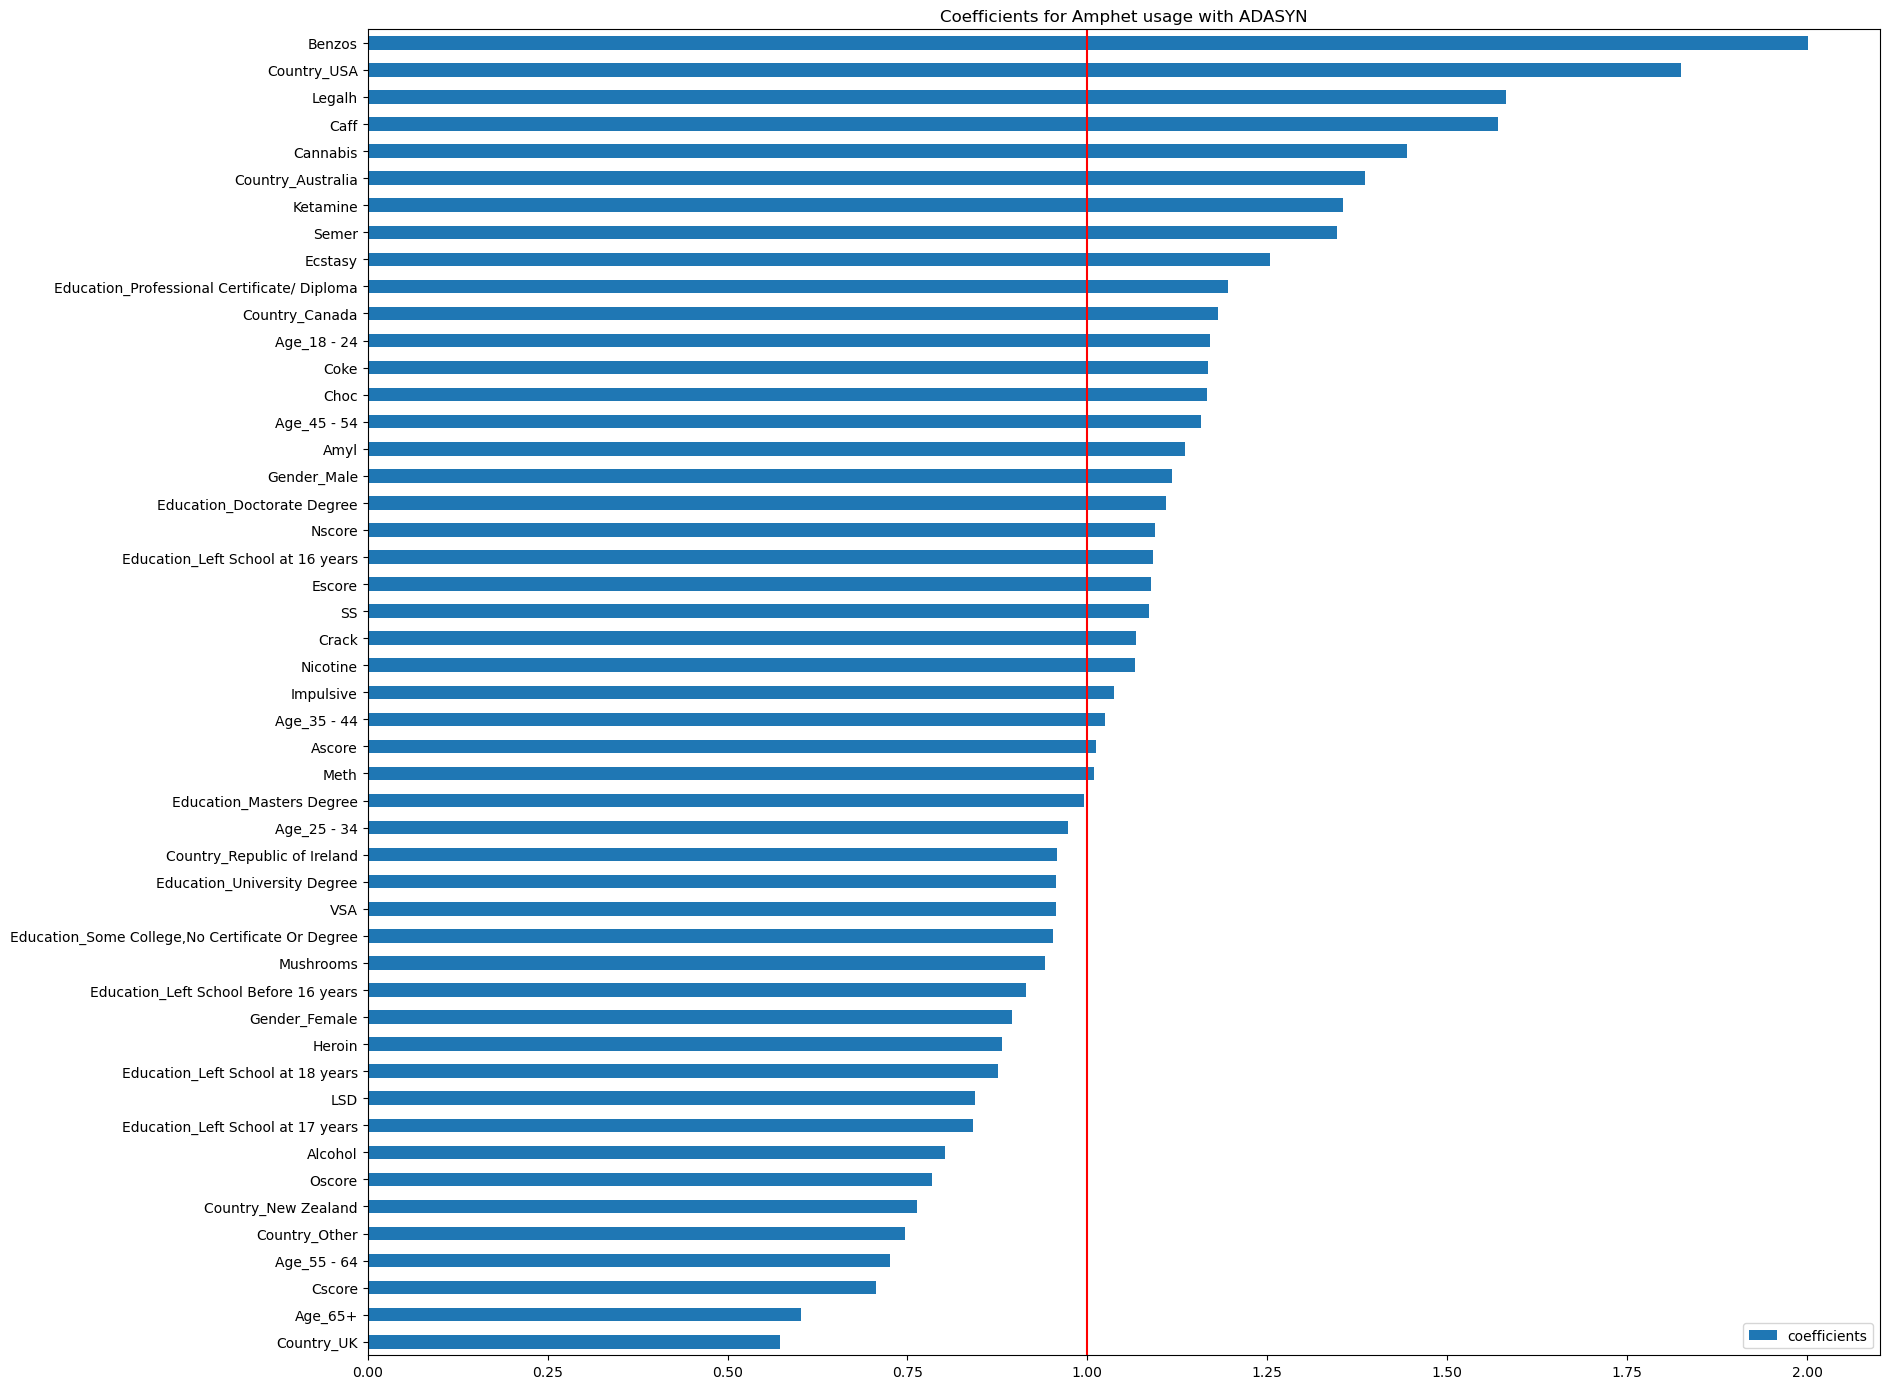

In [14]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for Amphet usage with ADASYN")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

The logistic regression coefficients indicate the influence of various factors on substance use identification. Factors such as Country_UK, Age_65+, Cscore, and Age_55-64 show moderate positive associations. Stronger associations are observed with factors like Benzos, Legalh, Caff, and Country_USA, suggesting significant impacts on substance use identification. Gender_Male, Age_18-24, and Education_Professional Certificate/Diploma also exhibit notable positive coefficients. Conversely, factors like Alcohol, LSD, and Education_Left School Before 16 years show less pronounced but still significant positive associations. These coefficients collectively highlight the diverse demographic, behavioral, and regional factors influencing the identification of substance use patterns in logistic regression models.

### Decision Tree <a id='DT'></a>

In [16]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.8137044967880086


,Predicted Non-user,Predicted User
True Non-User,362,46
True User,41,18


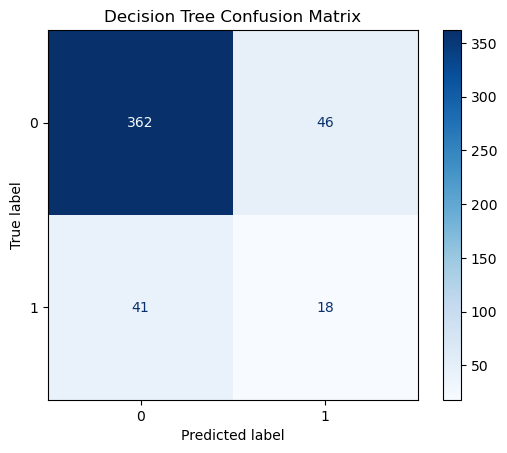

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       408
           1       0.28      0.31      0.29        59

    accuracy                           0.81       467
   macro avg       0.59      0.60      0.59       467
weighted avg       0.82      0.81      0.82       467



In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The Decision Tree model achieved perfect training accuracy but lower test accuracy at 81%. It showed good precision for the majority class (non-users) but lower performance for the minority class (users), reflected in lower recall and F1-score for class 1. Overall, the model's effectiveness in accurately predicting substance use patterns is limited, especially for identifying users, suggesting a need for improvement, possibly through model tuning or alternative algorithms to better handle class imbalances.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.05, 'model__min_samples_leaf': 1}
Best cross-validation score for Decision Tree: 0.87
Test set score for Decision Tree: 0.87
Best parameters for Random Forest:  {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best cross-validation score for Random Forest: 0.89
Test set score for Random Forest: 0.88


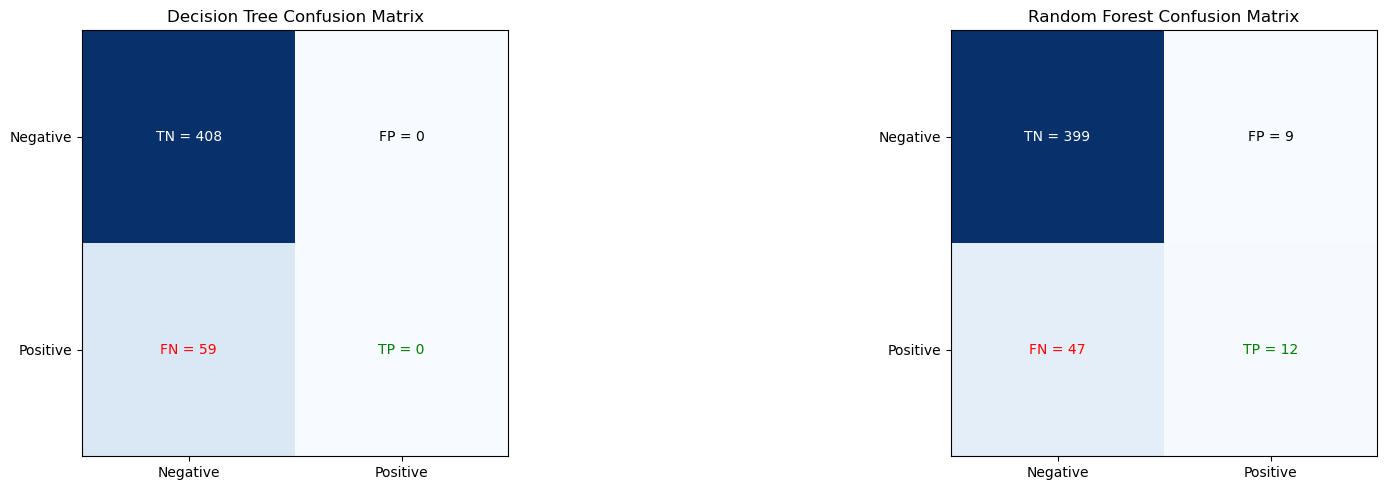

,Predicted Non-user,Predicted User
True Non-User,408,0
True User,59,0


,Predicted Non-user,Predicted User
True Non-User,399,9
True User,47,12



Decision Tree Confusion Matrix:
 [[408   0]
 [ 59   0]]

Random Forest Confusion Matrix:
 [[399   9]
 [ 47  12]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       408
           1       0.00      0.00      0.00        59

    accuracy                           0.87       467
   macro avg       0.44      0.50      0.47       467
weighted avg       0.76      0.87      0.81       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       408
           1       0.57      0.20      0.30        59

    accuracy                           0.88       467
   macro avg       0.73      0.59      0.62       467
weighted avg       0.85      0.88      0.85       467



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
The Decision Tree model shows high precision but extremely low recall for identifying substance users (class 1), resulting in an overall F1-score of 0.00 for that class. This indicates the model effectively predicts non-users but fails completely to identify users. In contrast, the Random Forest model performs better with higher precision and recall for both classes, albeit with lower recall for users compared to non-users. The overall accuracy for Random Forest is higher at 88%, suggesting it is more reliable for identifying substance use patterns compared to the Decision Tree in this context.

### Model Comparison <a id='Models'></a>

In [20]:

# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Logistic Regression baseline
metrics_df.loc['Logistic Regression'] = ['None', '87%', '88%', 'Good overall performance, but lower recall for minority class']

# Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ["C=100", "79%", "79%", "Lower precision and higher recall for minority class"]
metrics_df.loc['SMOTEN'] = ["C=1", "84%", "84%", "Moderate precision and recall balance"]
metrics_df.loc['SVMSMOTE'] = ["C=0.1", "81%", "81%", "Balanced precision and recall among all"]
metrics_df.loc['ADASYN'] = ["C=1", "77%", "77%", "Moderate precision and higher recall for minority class"]

# Decision Tree baseline and tuned
metrics_df.loc['Decision Tree (Base)'] = ['None', '100%', '81%', 'High training accuracy, but lower recall for minority class']
metrics_df.loc['Decision Tree'] = [
    "max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=1",
    "87%",
    "87%",
    "Good precision for majority class but fails to predict minority class effectively"
]

# Random Forest tuned
metrics_df.loc['Random Forest'] = [
    "max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50",
    "89%",
    "88%",
    "Balanced precision and recall, slightly better than Decision Tree for minority class"
]

# Display the dataframe
metrics_df


,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression,None,87%,88%,"Good overall performance, but lower recall for..."
BorderlineSMOTE,C=100,79%,79%,Lower precision and higher recall for minority...
SMOTEN,C=1,84%,84%,Moderate precision and recall balance
SVMSMOTE,C=0.1,81%,81%,Balanced precision and recall among all
ADASYN,C=1,77%,77%,Moderate precision and higher recall for minor...
Decision Tree (Base),None,100%,81%,"High training accuracy, but lower recall for m..."
Decision Tree,"max_depth=3, min_impurity_decrease=0.05, min_s...",87%,87%,Good precision for majority class but fails to...
Random Forest,"max_depth=10, min_samples_leaf=2, min_samples_...",89%,88%,"Balanced precision and recall, slightly better..."


### Conclusion:


Based on the analysis of the logistic regression models and tree-based classifiers (Decision Tree and Random Forest), several observations can be made. The logistic regression models, including those enhanced with SMOTE techniques (BorderlineSMOTE, SMOTEN, SVMSMOTE, ADASYN), show varying performance in handling class imbalance, with improvements seen in recall for the minority class but often at the expense of precision. The Decision Tree model, despite achieving perfect training accuracy, struggles with identifying the minority class in the test set. In contrast, the Random Forest model, optimized with hyperparameters, demonstrates balanced performance across precision and recall metrics.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>